In [339]:
import pandas as pd
import numpy as np
import math
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt    
from dataHack import removeColl 
%matplotlib inline
import warnings
import scipy
warnings.filterwarnings('ignore')
import dataHack as dh
import contigency as cg

In [340]:
train = pd.read_csv('Titanic+Data.csv')

In [341]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId                           1309 non-null int64
PassengerClass                        1309 non-null object
Name                                  1309 non-null object
Sex                                   1309 non-null object
Age                                   1046 non-null float64
No_of_Siblings_or_Spouses_on_Board    1309 non-null int64
No_of_Parents_or_Children_on_Board    1309 non-null int64
Ticket_Number                         1309 non-null object
Passenger_Fare                        1308 non-null float64
Cabin                                 295 non-null object
Port_of_Embarkation                   1307 non-null object
Life_Boat                             486 non-null object
Survived                              1309 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 133.0+ KB


In [344]:
test = pd.DataFrame()#train[900:] #pd.read_csv('titanicml.csv')

In [345]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [346]:
data = pd.concat([train,test])

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId                           1309 non-null int64
PassengerClass                        1309 non-null object
Name                                  1309 non-null object
Sex                                   1309 non-null object
Age                                   1046 non-null float64
No_of_Siblings_or_Spouses_on_Board    1309 non-null int64
No_of_Parents_or_Children_on_Board    1309 non-null int64
Ticket_Number                         1309 non-null object
Passenger_Fare                        1308 non-null float64
Cabin                                 295 non-null object
Port_of_Embarkation                   1307 non-null object
Life_Boat                             486 non-null object
Survived                              1309 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 143.2+ KB


In [348]:
print ("Basic statistical description:")
data.describe()

Basic statistical description:


,PassengerId,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Passenger_Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881135,0.498854,0.385027,33.295479
std,378.020061,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,NaN,0.000000,0.000000,NaN
50%,655.000000,NaN,0.000000,0.000000,NaN
75%,982.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,80.000000,8.000000,9.000000,512.329200


In [349]:
print ("Dimension of train data {}".format(train.shape))
print ("Dimension of test data {}".format(test.shape))

Dimension of train data (1309, 13)
Dimension of test data (0, 0)


AttributeError: 'DataFrame' object has no attribute 'Age'

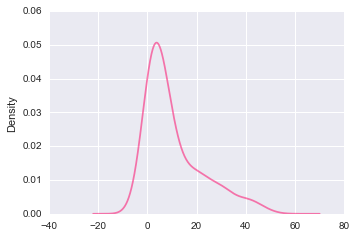

In [350]:
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.6

ax1 = plt.subplot2grid((2,3), (0,0))
train.Age.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Age.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,3), (0,1))
train.PassengerClass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.PassengerClass.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,3), (0,2))
train.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Sex.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,3), (1,0), colspan=2)
train.Passenger_Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
test.Passenger_Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax4.set_xlabel('Fare')
ax4.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')

ax5 = plt.subplot2grid((2,3), (1,2))
train.Port_of_Embarkation.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
test.Port_of_Embarkation.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax5.set_ylabel('Embarked')
ax5.set_xlabel('Frequency')
ax5.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

In [351]:
def TTDistplot(train,test,Col,plt,loc,size=(2,3)):
    
    ax1 = plt.subplot2grid(size, loc)
    train[Col].value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
    test[Col].value_counts().plot(kind='kde', label='test', alpha=alpha)
    ax1.set_xlabel(Col)
    ax1.set_title("What's the distribution of " +Col)
    plt.legend(loc='best')
    #plt.tight_layout()
  

In [352]:
def TTBarplot(train,test,Col,plt,loc,size=(2,3)):
    ax3 = plt.subplot2grid(size, loc)
    train[Col].value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
    test[Col].value_counts().plot(kind='barh', label='test', alpha=alpha)
    ax3.set_ylabel(Col)
    ax3.set_xlabel('Frequency')
    ax3.set_title("What's the distribution of "+Col )
    plt.legend(loc='best')

In [353]:
def dplot():
    plt.rc('font', size=13)
    fig = plt.figure(figsize=(18, 8))
    alpha = 0.6
    return plt

KeyError: 'Age'

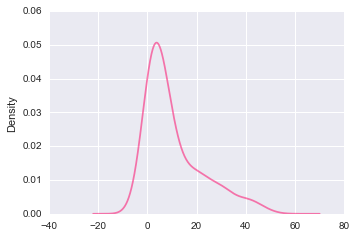

In [354]:
dp=dplot()
loc=(0,0)
size=(2,3) #(size suitable for 3 columns 2 rows)
TTDistplot(train,test,'Age',dp,loc,size)
loc=(0,1)
size=(4,3)
TTDistplot(train,test,'Passenger_Fare',dp,loc,size)


In [355]:
# Use it to iterate [(j,i) for j in range(size[0]) for i in range(size[1])]

KeyError: 'Passenger_Fare'

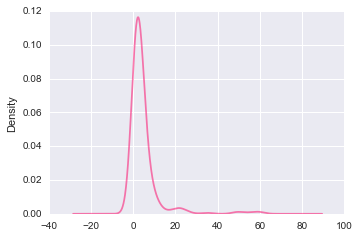

In [356]:
dp=dplot()
loc=(0,0)
size=(2,3)
TTDistplot(train,test,'Passenger_Fare',dp,loc,size) 
loc=(0,1)
TTBarplot(train,test,'Sex',dp,loc,size)

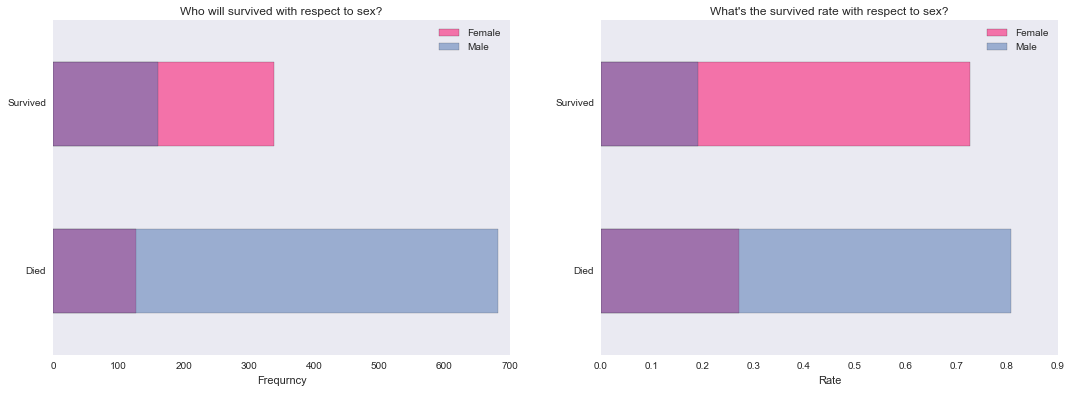

In [357]:
df_male = train[train.Sex=='Male'].Survived.value_counts().sort_index()
df_female = train[train.Sex=='Female'].Survived.value_counts().sort_index()
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
df_female.plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
df_male.plot(kind='barh', label='Male', alpha=alpha-0.1)
ax1.set_xlabel('Frequrncy')
ax1.set_yticklabels(['Died', 'Survived'])
ax1.set_title("Who will survived with respect to sex?" )
plt.legend(loc='best')
plt.grid()

ax2 = plt.subplot2grid((1,2), (0,1))
(df_female/train[train.Sex=='Female'].shape[0]).plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
(df_male/train[train.Sex=='Male'].shape[0]).plot(kind='barh', label='Male', alpha=alpha-0.1)
ax2.set_xlabel('Rate')
ax2.set_yticklabels(['Died', 'Survived'])
ax2.set_title("What's the survived rate with respect to sex?" )
plt.legend(loc='best')
plt.grid()

### Null Values

In [358]:
data.columns[pd.isnull(data).sum() > 0]

Index([u'Age', u'Passenger_Fare', u'Cabin', u'Port_of_Embarkation',
       u'Life_Boat'],
      dtype='object')

In [359]:
null_coll=data.columns[pd.isnull(data).any()].values.tolist()
for i in null_coll:
    print i,' - ',len(data[data[i].isnull()])

Age  -  263
Passenger_Fare  -  1
Cabin  -  1014
Port_of_Embarkation  -  2
Life_Boat  -  823


#### Rows with null value

In [360]:
len(data[pd.isnull(data).sum(axis=1) > 0])

1129

#### Null Rows in Age Colmn

In [361]:
data[pd.isnull(data[['Age']]).sum(axis=1) > 0]

,PassengerId,PassengerClass,Name,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Ticket_Number,Passenger_Fare,Cabin,Port_of_Embarkation,Life_Boat,Survived
15,16,First,Mr. John D Baumann,Male,NaN,0,0,PC 17318,25.9250,NaN,Southampton,NaN,No
37,38,First,"Mr. George (""George Arthur Brayton"") Bradley",Male,NaN,0,0,111427,26.5500,NaN,Southampton,9,Yes
40,41,First,Dr. Arthur Jackson Brewe,Male,NaN,0,0,112379,39.6000,NaN,Cherbourg,NaN,No
46,47,First,Mr. Alexander Cairns,Male,NaN,0,0,113798,31.0000,NaN,Southampton,NaN,No
59,60,First,Mrs. Henry Arthur Jr (Eleanor Genevieve Fosdi...,Female,NaN,0,0,17770,27.7208,NaN,Cherbourg,5,Yes
69,70,First,Mrs. (Edith Martha Bowerman) Chibnall,Female,NaN,0,1,113505,55.0000,E33,Southampton,6,Yes
70,71,First,Mr. Roderick Robert Crispin Chisholm,Male,NaN,0,0,112051,0.0000,NaN,Southampton,NaN,No
74,75,First,Mr. George Quincy Clifford,Male,NaN,0,0,110465,52.0000,A14,Southampton,NaN,No
80,81,First,Mr. John Bertram Crafton,Male,NaN,0,0,113791,26.5500,NaN,Southampton,NaN,No
106,107,First,Mr. John Farthing,Male,NaN,0,0,PC 17483,221.7792,C95,Southampton,NaN,No


#### Rows around Null value

In [362]:
x=data[pd.isnull(data[['Age']]).sum(axis=1) > 0].index.tolist()
z=[[i-1,i,i+1] for i in x]
z=np.ndarray.flatten(np.array(z))


In [363]:
data.iloc[z]

,PassengerId,PassengerClass,Name,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Ticket_Number,Passenger_Fare,Cabin,Port_of_Embarkation,Life_Boat,Survived
14,15,First,Mr. Algernon Henry Wilson Barkworth,Male,80.0,0,0,27042,30.0000,A23,Southampton,B,Yes
15,16,First,Mr. John D Baumann,Male,NaN,0,0,PC 17318,25.9250,NaN,Southampton,NaN,No
16,17,First,Mr. Quigg Edmond Baxter,Male,24.0,0,1,PC 17558,247.5208,B58 B60,Cherbourg,NaN,No
36,37,First,Miss. Elsie Edith Bowerman,Female,22.0,0,1,113505,55.0000,E33,Southampton,6,Yes
37,38,First,"Mr. George (""George Arthur Brayton"") Bradley",Male,NaN,0,0,111427,26.5500,NaN,Southampton,9,Yes
38,39,First,Mr. John Bertram Brady,Male,41.0,0,0,113054,30.5000,A21,Southampton,NaN,No
39,40,First,Mr. Emil Brandeis,Male,48.0,0,0,PC 17591,50.4958,B10,Cherbourg,NaN,No
40,41,First,Dr. Arthur Jackson Brewe,Male,NaN,0,0,112379,39.6000,NaN,Cherbourg,NaN,No
41,42,First,Mrs. James Joseph (Margaret Tobin) Brown,Female,44.0,0,0,PC 17610,27.7208,B4,Cherbourg,6,Yes
45,46,First,Major. Archibald Willingham Butt,Male,45.0,0,0,113050,26.5500,B38,Southampton,NaN,No


## Replace NaN with moving average 5

In [364]:
x=data[pd.isnull(data[['Age']]).sum(axis=1) > 0].index.tolist()
z=[[i,i-1,i+1,i+2,i-2] for i in x]
for i in z:
    data= data.set_value(i[0],'Age',data['Age'].iloc[i[1:]].mean())
z=np.ndarray.flatten(np.array(z))

In [365]:
data.iloc[z]

,PassengerId,PassengerClass,Name,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Ticket_Number,Passenger_Fare,Cabin,Port_of_Embarkation,Life_Boat,Survived
15,16,First,Mr. John D Baumann,Male,45.000000,0,0,PC 17318,25.9250,NaN,Southampton,NaN,No
14,15,First,Mr. Algernon Henry Wilson Barkworth,Male,80.000000,0,0,27042,30.0000,A23,Southampton,B,Yes
16,17,First,Mr. Quigg Edmond Baxter,Male,24.000000,0,1,PC 17558,247.5208,B58 B60,Cherbourg,NaN,No
17,18,First,Mrs. James (Helene DeLaudeniere Chaput) Baxter,Female,50.000000,0,1,PC 17558,247.5208,B58 B60,Cherbourg,6,Yes
13,14,First,"Miss. Ellen ""Nellie"" Barber",Female,26.000000,0,0,19877,78.8500,NaN,Southampton,6,Yes
37,38,First,"Mr. George (""George Arthur Brayton"") Bradley",Male,39.000000,0,0,111427,26.5500,NaN,Southampton,9,Yes
36,37,First,Miss. Elsie Edith Bowerman,Female,22.000000,0,1,113505,55.0000,E33,Southampton,6,Yes
38,39,First,Mr. John Bertram Brady,Male,41.000000,0,0,113054,30.5000,A21,Southampton,NaN,No
39,40,First,Mr. Emil Brandeis,Male,48.000000,0,0,PC 17591,50.4958,B10,Cherbourg,NaN,No
35,36,First,Miss. Grace Scott Bowen,Female,45.000000,0,0,PC 17608,262.3750,NaN,Cherbourg,4,Yes


In [366]:
data['Life_Boat']=data['Life_Boat'].fillna('0')

In [367]:
data['BoatFlag']= data['Life_Boat'].apply(lambda l: 0 if l =='0' else 1)

In [368]:
data =data.drop('Life_Boat',1)

In [369]:
data.head()

,PassengerId,PassengerClass,Name,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Ticket_Number,Passenger_Fare,Cabin,Port_of_Embarkation,Survived,BoatFlag
0,1,First,Miss. Elisabeth Walton Allen,Female,29.0000,0,0,24160,211.3375,B5,Southampton,Yes,1
1,2,First,Master. Hudson Trevor Allison,Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,Yes,1
2,3,First,Miss. Helen Loraine Allison,Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,No,0
3,4,First,Mr. Hudson Joshua Creighton Allison,Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,No,0
4,5,First,Mrs. Hudson J C (Bessie Waldo Daniels) Allison,Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,No,0


In [370]:
data=data.fillna(method='ffill')

In [371]:
data['Port_of_Embarkation'].value_counts()

Southampton    915
Cherbourg      271
Queenstown     123
Name: Port_of_Embarkation, dtype: int64

In [372]:
data.columns[pd.isnull(data).sum() > 0]

Index([], dtype='object')

### Encode binary category

In [373]:
data['Survived']=data['Survived'].replace(to_replace={'Yes':0,'No':1})
data['Sex']=data['Sex'].replace(to_replace={'Female':0,'Male':1})
data['Cabin']=data['Cabin'].apply(lambda l: l[0])

In [374]:
#pd.get_dummies(data).columns.tolist()

In [375]:
data=data.drop(['Name','Ticket_Number'],1)
data.head()

,PassengerId,PassengerClass,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Passenger_Fare,Cabin,Port_of_Embarkation,Survived,BoatFlag
0,1,First,0,29.0000,0,0,211.3375,B,Southampton,0,1
1,2,First,1,0.9167,1,2,151.5500,C,Southampton,0,1
2,3,First,0,2.0000,1,2,151.5500,C,Southampton,1,0
3,4,First,1,30.0000,1,2,151.5500,C,Southampton,1,0
4,5,First,0,25.0000,1,2,151.5500,C,Southampton,1,0


In [376]:
data=pd.get_dummies(data)

## Standardize

In [377]:
data.head()

,PassengerId,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Passenger_Fare,Survived,BoatFlag,PassengerClass_First,PassengerClass_Second,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Port_of_Embarkation_Cherbourg,Port_of_Embarkation_Queenstown,Port_of_Embarkation_Southampton
0,1,0,29.0000,0,0,211.3375,0,1,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,0.9167,1,2,151.5500,0,1,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,0,2.0000,1,2,151.5500,1,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,30.0000,1,2,151.5500,1,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,25.0000,1,2,151.5500,1,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Create Models 

In [378]:
cat_var= data.drop(['Survived','PassengerId'],1).select_dtypes(include = ['int64','float64']).columns.values.tolist()

In [379]:
len(cat_var),len(data.columns)

(20, 22)

In [380]:
from sklearn.tree import DecisionTreeClassifier

In [381]:
lb=DecisionTreeClassifier()

In [382]:
pred=data[cat_var][:900]
target=data[['Survived']][:900]

In [383]:
print pred.info()
print target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 20 columns):
Sex                                   900 non-null int64
Age                                   900 non-null float64
No_of_Siblings_or_Spouses_on_Board    900 non-null int64
No_of_Parents_or_Children_on_Board    900 non-null int64
Passenger_Fare                        900 non-null float64
BoatFlag                              900 non-null int64
PassengerClass_First                  900 non-null float64
PassengerClass_Second                 900 non-null float64
PassengerClass_Third                  900 non-null float64
Cabin_A                               900 non-null float64
Cabin_B                               900 non-null float64
Cabin_C                               900 non-null float64
Cabin_D                               900 non-null float64
Cabin_E                               900 non-null float64
Cabin_F                               900 non-null float64
Cabin_G           

In [384]:
lb.fit(pred,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [385]:
pred.head()

,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Passenger_Fare,BoatFlag,PassengerClass_First,PassengerClass_Second,PassengerClass_Third,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Port_of_Embarkation_Cherbourg,Port_of_Embarkation_Queenstown,Port_of_Embarkation_Southampton
0,0,29.0000,0,0,211.3375,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.9167,1,2,151.5500,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2.0000,1,2,151.5500,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,30.0000,1,2,151.5500,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,25.0000,1,2,151.5500,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [386]:
test=data[900:]

In [387]:
test[cat_var]

,Sex,Age,No_of_Siblings_or_Spouses_on_Board,No_of_Parents_or_Children_on_Board,Passenger_Fare,BoatFlag,PassengerClass_First,PassengerClass_Second,PassengerClass_Third,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Port_of_Embarkation_Cherbourg,Port_of_Embarkation_Queenstown,Port_of_Embarkation_Southampton
900,1,23.000000,1,2,23.4500,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
901,0,25.000000,1,2,23.4500,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
902,1,23.666667,1,2,23.4500,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
903,0,25.916667,1,2,23.4500,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
904,1,23.000000,0,0,7.8958,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
905,1,32.000000,0,0,7.8542,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
906,1,27.000000,0,0,7.8542,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
907,0,20.000000,1,0,9.8250,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
908,0,21.000000,1,0,9.8250,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
909,1,32.000000,0,0,7.9250,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [388]:
test['Predict']= lb.predict(test[cat_var])

In [389]:
#pd.DataFrame(lb.predict_proba(test[cat_var]))

In [390]:
from sklearn.metrics import confusion_matrix

In [391]:
cnf=confusion_matrix(test['Survived'],test['Predict'],labels=[0,1])
cnf

array([[ 91,  12],
       [  4, 302]])

In [392]:
test[['Survived','Predict']].drop_duplicates()

,Survived,Predict
900,1,1
905,0,0
926,0,1
968,1,0


In [393]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 91  12]
 [  4 302]]


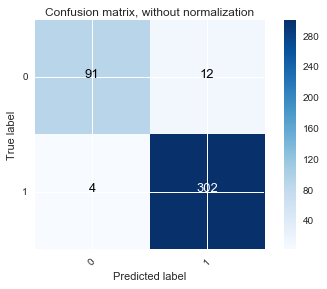

In [394]:
plot_confusion_matrix(cnf, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [395]:
test.groupby(['Survived','Predict']).count()

PassengerId  Sex  Age  No_of_Siblings_or_Spouses_on_Board  \
Survived Predict                                                              
0        0                 91   91   91                                  91   
         1                 12   12   12                                  12   
1        0                  4    4    4                                   4   
         1                302  302  302                                 302   

                  No_of_Parents_or_Children_on_Board  Passenger_Fare  \
Survived Predict                                                       
0        0                                        91              91   
         1                                        12              12   
1        0                                         4               4   
         1                                       302             302   

                  BoatFlag  PassengerClass_First  PassengerClass_Second  \
Survived Predict                                                          
0        0              91                    91                     91   
         1              12                    12                     12   
1        0               4                     4                      4   
         1             302                   302                    302   

                  PassengerClass_Third               ...                 \
Survived Predict                                     ...                  
0        0                          91               ...                  
         1                          12               ...                  
1        0                           4               ...                  
         1                         302               ...                  

                  Cabin_B  Cabin_C  Cabin_D  Cabin_E  Cabin_F  Cabin_G  \
Survived Predict                                                         
0        0             91       91       91       91       91       91   
         1             12       12       12       12       12       12   
1        0              4        4        4        4        4        4   
         1            302      302      302      302      302      302   

                  Cabin_T  Port_of_Embarkation_Cherbourg  \
Survived Predict                                           
0        0             91                             91   
         1             12                             12   
1        0              4                              4   
         1            302                            302   

                  Port_of_Embarkation_Queenstown  \
Survived Predict                                   
0        0                                    91   
         1                                    12   
1        0                                     4   
         1                                   302   

                  Port_of_Embarkation_Southampton  
Survived Predict                                   
0        0                                     91  
         1                                     12  
1        0                                      4  
         1                                    302  

[4 rows x 21 columns]

In [406]:
from sklearn import metrics

In [397]:
len(test['Survived']),len(lb.predict_proba(test[cat_var])[:,1])

(409, 409)

In [421]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ =  metrics.roc_curve(test['Survived'][test['Survived']==i],lb.predict_proba(test[cat_var][test['Survived']==i])[:,i])
    roc_auc[i] =  metrics.auc(fpr[i], tpr[i])

In [422]:
#fpr, tpr, thresholds = metrics.roc_curve(test['Survived'], lb.predict_proba(test[cat_var])[:,1])

In [423]:
fpr

{0: array([ 0.        ,  0.88349515,  1.        ]), 1: array([ nan,  nan])}

In [424]:
tpr

{0: array([ nan,  nan,  nan]), 1: array([ 0.9869281,  1.       ])}

In [425]:
thresholds

array([ 2.,  1.,  0.])

In [336]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

NameError: name 'roc_auc' is not defined